# Machine Learning using Spotify's dataset

- 🎯 The goal of this project is to create effective Machine Learning models to predict the popularity of songs on Spotify.
- Therefore, the focus will be on developing a supervised classification model to predict whether a song will be popular or not.

PS: the table of contents will not work in GitHub's renderer.

## Exploratory Data Analysis (EDA)

### Importing Packages and Reading the Data

In [45]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Reading dataframe
df = pd.read_csv('dataset.csv',index_col=0)

### Basic Stats

In [30]:
# Taking a peek at the dataset
display(df.head())

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [31]:
# Checking dtypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
# Basic stats of numerical columns
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Histograms (Numerical Columns)

Text(0.5, 0.98, 'Histogram of the Numerical Features')

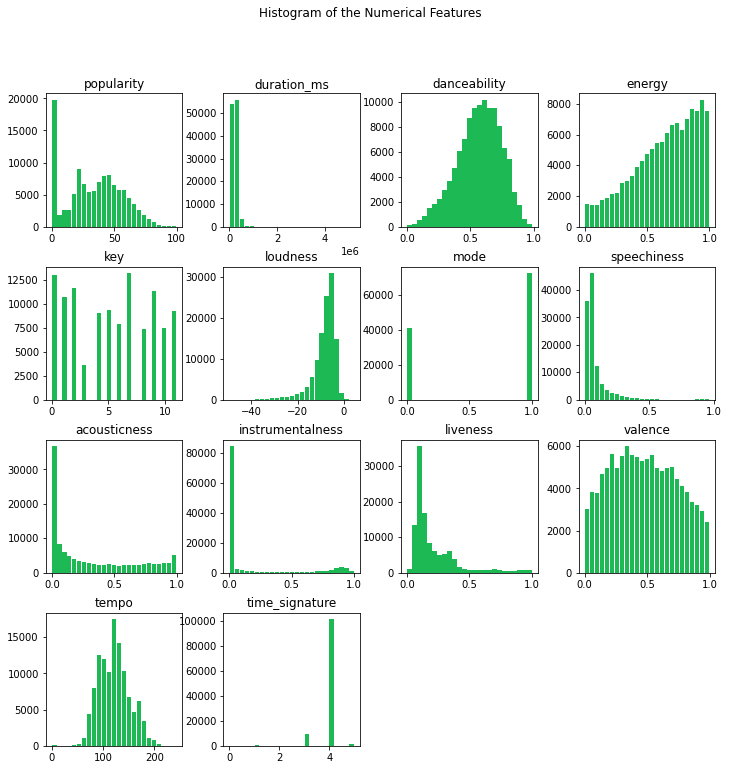

In [ ]:
# Checking the histogram of all numerical features
ax = df.hist(bins=25, grid=False, figsize=(12,12), zorder=2, rwidth=0.9, color="#1DB954")
plt.suptitle("Histogram of the Numerical Features")

### Cardinality (Non-numerical Columns)

In [ ]:
# Check the count of distinct values of non-numerical columns
print("---- Count of Distinct Values ----\n")
for col in df.columns:
    if df[col].dtype == 'object':
        distinct_count = df[col].nunique()
        print(f"-> {col}: {distinct_count}")

---- Count of Distinct Values ----

-> track_id: 89741
-> artists: 31437
-> album_name: 46589
-> track_name: 73608
-> track_genre: 114


### Duplicates

In this dataset, there is a relevant issue related to duplicates. So, before move on in the EDA, we need to solve this problem to have an accurate analysis.

- There are some songs that have the same track_id, but different track_genre. This may be caused because the same song can be added in different playlists.

In [ ]:
# Example of same song with different genres

df[['track_id','artists','track_name','album_name','track_genre']][df.artists == 'Manuel Turizo']

,track_id,artists,track_name,album_name,track_genre
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,latin
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,latino
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,reggae
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,reggaeton


So, in this case, we are going to remove all the rows with the same track_id and track_name.

In [ ]:
# Checking the shape before the drop
df.shape

(114000, 20)

In [ ]:
# Checking the shape after the drop
df = df.drop_duplicates(subset=['track_id','track_name']).reset_index(drop=True)
df.shape

(89741, 20)

### Top 10 Most Popular Categories

In [ ]:
def top10MostPop(column,title=None):
    
    min_songs = 5
    
    calcPopularity = df.groupby(column)['popularity'].agg(['mean','count'])
    # Calculating std for the mean of popularity
    std_pop = np.std(calcPopularity['mean'])
    # Defining a limit to identify outliers
    lim_outliers = calcPopularity['mean'].mean() + 2 * std_pop
    # Filter out the outliers
    top10 = calcPopularity[(calcPopularity['count'] >= min_songs) & (calcPopularity['mean'] >= lim_outliers)].sort_values(by='mean', ascending=False).head(10).reset_index()
    sns.barplot(data= top10, x='mean', y=column, orient='h',color="#1DB954")
    if title:
       plt.title(f"{title}")
    plt.ylabel(f"{column}")
    plt.xlabel('Popularity')
    plt.show()
    return

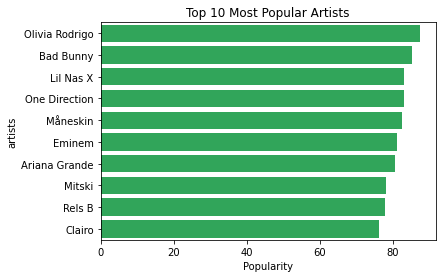

In [ ]:
top10MostPop('artists',"Top 10 Most Popular Artists")

## Preprocessing

### Enrich Data

In the 'artists' column, where there is more than one artist, the information is separated by a semicolon. We then calculate whether the song has a featuring or not.

In [ ]:
# Create a column that shows if the song has a featuring or not
df['feat'] = df['artists'].apply(lambda x: 1 if ';' in str(x) else 0)
df[['artists','feat']].head(10)

,artists,feat
0,Gen Hoshino,0
1,Ben Woodward,0
2,Ingrid Michaelson;ZAYN,1
3,Kina Grannis,0
4,Chord Overstreet,0
5,Tyrone Wells,0
6,A Great Big World;Christina Aguilera,1
7,Jason Mraz,0
8,Jason Mraz;Colbie Caillat,1
9,Ross Copperman,0


### Columns Removal

In [ ]:
# Deleting columns with high cardinality
df = df.drop(columns = ['track_id','track_name','album_name','track_genre','artists'])
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'feat'],
      dtype='object')

### Dtypes

In [ ]:
# Change 'explicit' to int64 (it is the only boolean in the dataset)
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89741 non-null  int64  
 1   duration_ms       89741 non-null  int64  
 2   explicit          89741 non-null  int64  
 3   danceability      89741 non-null  float64
 4   energy            89741 non-null  float64
 5   key               89741 non-null  int64  
 6   loudness          89741 non-null  float64
 7   mode              89741 non-null  int64  
 8   speechiness       89741 non-null  float64
 9   acousticness      89741 non-null  float64
 10  instrumentalness  89741 non-null  float64
 11  liveness          89741 non-null  float64
 12  valence           89741 non-null  float64
 13  tempo             89741 non-null  float64
 14  time_signature    89741 non-null  int64  
 15  feat              89741 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 11

### Missing Values

In [ ]:
# Checking missing values
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
feat                0
dtype: int64

### Target Variable

- In this project, our target variable is popularity. Since we are building a supervised classification model, we need to change popularity which is a number based on the total number of plays the track has had and how recent those plays are.
If you want to know whether a song will be popular or not, you will need to establish a **popularity threshold**. For example, you could define that all songs with a popularity above 70 are considered popular and those below 70 are considered non-popular. This threshold is not standard and can be adjusted to test different scenarios.

In [ ]:
df['target'] = df['popularity'].apply(lambda x: 1 if x>70 else 0)
df[['popularity','target']].head(10)

,popularity,target
0,73,1
1,55,0
2,57,0
3,71,1
4,82,1
5,58,0
6,74,1
7,80,1
8,74,1
9,56,0


In [ ]:
# Drop Popularity
df = df.drop(columns = 'popularity')

In [ ]:
# Check the columns
df.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'feat', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       89741 non-null  int64  
 1   explicit          89741 non-null  int64  
 2   danceability      89741 non-null  float64
 3   energy            89741 non-null  float64
 4   key               89741 non-null  int64  
 5   loudness          89741 non-null  float64
 6   mode              89741 non-null  int64  
 7   speechiness       89741 non-null  float64
 8   acousticness      89741 non-null  float64
 9   instrumentalness  89741 non-null  float64
 10  liveness          89741 non-null  float64
 11  valence           89741 non-null  float64
 12  tempo             89741 non-null  float64
 13  time_signature    89741 non-null  int64  
 14  feat              89741 non-null  int64  
 15  target            89741 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 11

We only have numerical columns in the dataset now.

### Normalization

- We need to normalize this dataset because the variables are in different scales. Normalization ensures that all the variables contribute equally to the analysis and prevents any one variable from dominating the model. When variables are in different scales, larger values tend to have a greater impact on the outcome of the analysis, regardless of whether they are more important predictors or not. This can lead to biased results, and makes it difficult to compare the relative importance of each variable.

In [ ]:
# Selecting the numerical columns that need normalization
X_cols = [col for col in df.columns if col not in ['target']]
X_cols

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'feat']

In [ ]:
# Normalize only numerical columns
X = df[X_cols]
X_normalized = (X-X.min())/(X.max()-X.min())

In [ ]:
# Check if it worked
print('Min of the normalized df:\n',X_normalized.min()) 
print('Max of the normalized df:\n',X_normalized.max()) 

Min of the normalized df:
 duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
feat                0.0
dtype: float64
Max of the normalized df:
 duration_ms         1.0
explicit            1.0
danceability        1.0
energy              1.0
key                 1.0
loudness            1.0
mode                1.0
speechiness         1.0
acousticness        1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
time_signature      1.0
feat                1.0
dtype: float64


## Model

### Train-Validation-Test Split

In [ ]:
# Check lenght of X and Y
print(len(X_normalized))
print(len(df.target))

89741
89741


- The train-test split will be 70-30.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df.target, test_size=0.3, random_state=42)

- Now we are going to use **StratifiedKFold** to split train and validation sets. It generates test sets such that all contain the same distribution of classes, or as close as possible.

In [32]:
# Split the data into training and validation sets
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    # Get the training and validation data
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    

In [33]:
# checando as proporções da classe 1 na divisão
print(f'Dimensions: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proportion of X_train for class=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proportion of X_val for class=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")
     

Dimensions: ((62818, 15), (12563, 15), (62818,), (12563,))

Proportion of X_train for class=1:  0.0307
Proportion of X_val for class=1:    0.0307


### Baseline

In the context of machine learning, a baseline is the simplest or most basic model that can be used as a starting point for comparison with other, more complex models. A baseline model is often used to establish a **performance threshold** that any new model must surpass in order to be considered an improvement.

In [35]:
# Instantiating the model
logReg = LogisticRegression()
# Training the model
logReg.fit(X_train, y_train)
# Predicting on training data
y_pred_base_train = logReg.predict(X_train)
# Predicting on validation data
y_pred_base_val = logReg.predict(X_val)

In [41]:
# Displaying the logistic regression coefficients

base = {
    "Features": X_normalized.columns,
    "Coef": logReg.coef_.tolist()[0]
}

baseline = pd.DataFrame(base)
baseline

,Features,Coef
0,duration_ms,-0.533171
1,explicit,0.744483
2,danceability,1.293482
3,energy,-1.468505
4,key,0.049172
5,loudness,4.764261
6,mode,-0.114876
7,speechiness,-1.764482
8,acousticness,-1.126975
9,instrumentalness,-2.457330


These coeficients can be interpreted like this:


 “For every one-unit increase in [X variable], the odds that the observation is in (y class) are [coefficient] times as large as the odds that the observation is not in (y class) when all other variables are held constant.”



### Baseline's Validation

In [46]:
print('Train Data:')

print('---' * 20)
print('Model:    Logistic Regression (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Validation Data:')
print('---' * 20)
print('Model:    Logistic Regression (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)
     

Train Data:
------------------------------------------------------------
Model:    Logistic Regression (baseline)

accuracy:  0.9692763220732911
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Validation Data:
------------------------------------------------------------
Model:    Logistic Regression (baseline)

accuracy:  0.9692748547321499
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------
